## Flight Price Prediction (EDA + Feature Engineering)

In [1]:
#importing basic libraries
import pandas as pd#It used for cleaning the data
import numpy as np#It is used for mathematical purpose
import matplotlib.pyplot as plt#It is used for Data Visualization
import seaborn as sns#It is used for Data Visualization
%matplotlib inline

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Loading the train_data
train_df = pd.read_excel('../input/flight-price/Data_Train.xlsx')
train_df.head()#displays the first 5 rows of the data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Loading the test_data
test_df = pd.read_excel('../input/flight-price/Test_set.xlsx')
test_df.head()#It shows the first 5 rows of the data 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
#appending the two data sets unsing append method
final_df = train_df.append(test_df)
final_df.head()#It shows the first  rows of the data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
final_df.tail()#It shows the bottom 5 rows of the data ,as we can see that there are Nan Values in the price column

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
final_df.info()#It shows the information of all data set columns with their data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
final_df.shape#It shows the rows and columns of the data

(13354, 11)

In [9]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
##Feature Engineering Process
final_df['Date_of_Journey'] = pd.to_datetime(final_df['Date_of_Journey'],dayfirst=True)#formatting the object to datetime

In [11]:
final_df['Date'] = final_df['Date_of_Journey'].dt.day#It separates the date of journey column into date column
final_df['Month'] = final_df['Date_of_Journey'].dt.month#It separates the date of journey column into month column
final_df['Year'] = final_df['Date_of_Journey'].dt.year#It separates the date of journey column into year column

In [12]:
final_df.head()#It shows the first 5 rows of the data, here we can see that separate date month and year columns

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
#dropping the date of journey column
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
final_df.head()#It shows that date of journey column has been removed

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [15]:
##splitting the arrival_time column
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [16]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
final_df.isnull().sum()##it shows the null value count

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [18]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])#It splits the arrival time into hour
final_df['Arrival_min'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])#It splits the arrival time into min

In [19]:
final_df.head(1)#It shows the arrival hour and min column

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [20]:
#changing the arrival hour and minute into int data type
final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
##dropping the arrival time column
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [23]:
final_df.head(1)#It shows the first 1 rows after dropping the arrival time

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [24]:
##splitting the departure time into hour and min
final_df['Departure_Hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Departure_min'] = final_df['Dep_Time'].str.split(':').str[1]

In [25]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [26]:
#changing the object type into int
final_df['Departure_Hour'] = final_df['Departure_Hour'].astype(int)
final_df['Departure_min'] = final_df['Departure_min'].astype(int)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Arrival_hour     13354 non-null  int64  
 13  Arrival_min      13354 non-null  int64  
 14  Departure_Hour   13354 non-null  int64  
 15  Departure_min    13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [28]:
##dropping the departure time
final_df.drop('Dep_Time',axis=1,inplace=True)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Departure_Hour   13354 non-null  int64  
 14  Departure_min    13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [30]:
final_df['Total_Stops'].unique()#It shows the unique data of this column

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [31]:
#encoding with the help of map function for total stops column
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [32]:
final_df['Total_Stops'].unique()#It shows the unique data after mapping

array([ 0.,  2.,  1.,  3., nan,  4.])

In [33]:
#null row index
null_row_index = final_df[final_df['Total_Stops'].isnull()].index
null_row_index

Int64Index([9039], dtype='int64')

In [34]:
final_df.drop(null_row_index,axis=0,inplace=True)#dropping the null row index

In [35]:
final_df.shape#It shows the number of records and fields

(13353, 15)

In [36]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  float64
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             13353 non-null  int64  
 9   Month            13353 non-null  int64  
 10  Year             13353 non-null  int64  
 11  Arrival_hour     13353 non-null  int64  
 12  Arrival_min      13353 non-null  int64  
 13  Departure_Hour   13353 non-null  int64  
 14  Departure_min    13353 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 1.6+ MB


In [38]:
#creating the function for duration column into minutes
''' def duration_to_min(s):
    if 'm' not in s:
        s = s.split('h')
        duration = int(s[0])*60
        return duration
    s = s.replace('m',"")
    s = s.split('h')
    duration = (60*int(s[0])+int(s[1]))
    return duration'''

' def duration_to_min(s):\n    if \'m\' not in s:\n        s = s.split(\'h\')\n        duration = int(s[0])*60\n        return duration\n    s = s.replace(\'m\',"")\n    s = s.split(\'h\')\n    duration = (60*int(s[0])+int(s[1]))\n    return duration'

In [39]:
def duration_to_min(s):
    if 'm' not in s:
        s = s.split('h')
        duration = int(s[0])*60
        return duration
    s = s.replace('m',"").replace('h',"")
    s = s.split()
    duration = (60*int(s[0])+int(s[1]))
    return duration

In [40]:
error_5m = final_df[final_df['Duration'] =='5m'].index
error_5m

Int64Index([6474, 2660], dtype='int64')

In [41]:
#dropping the '5m' 
final_df.drop(error_5m,axis=0,inplace=True)

In [42]:
#applying that function using apply function
final_df['Duration'] = final_df.Duration.apply(duration_to_min)

In [43]:
final_df.info()#It shows the info of the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13350 non-null  int64  
 5   Total_Stops      13350 non-null  float64
 6   Additional_Info  13350 non-null  object 
 7   Price            10680 non-null  float64
 8   Date             13350 non-null  int64  
 9   Month            13350 non-null  int64  
 10  Year             13350 non-null  int64  
 11  Arrival_hour     13350 non-null  int64  
 12  Arrival_min      13350 non-null  int64  
 13  Departure_Hour   13350 non-null  int64  
 14  Departure_min    13350 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [44]:
final_df.head()#It shows the first 5 rows

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [45]:
final_df['Airline'].unique()#It shows the unique data of the airline

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [47]:
air_line = pd.DataFrame(final_df.groupby('Airline',as_index=False)['Duration'].sum())
sorted_air_line = air_line.sort_values('Duration',ascending=False)

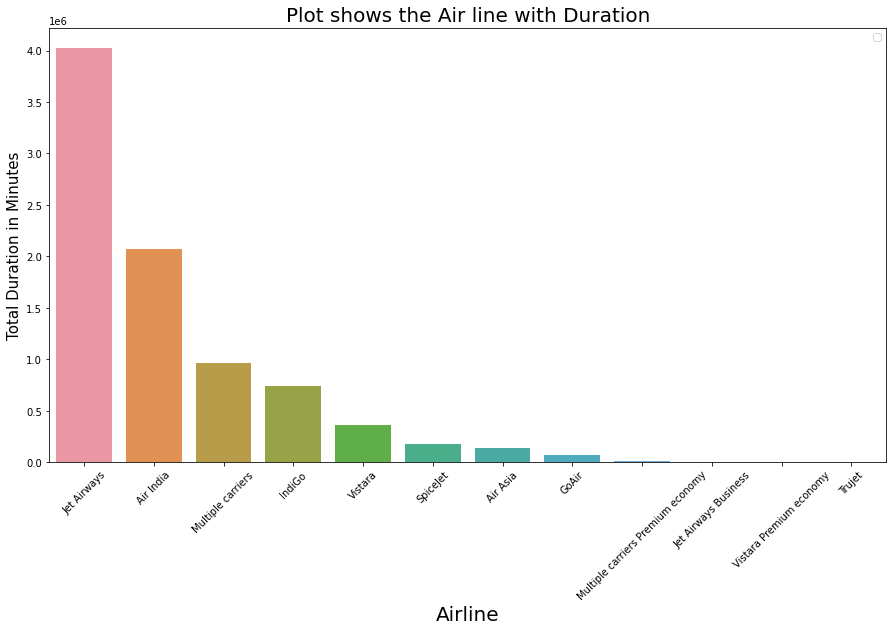

In [48]:
plt.figure(figsize=(15,8))
s = sns.barplot(x='Airline',y='Duration',data=sorted_air_line)
rotate=plt.xticks(rotation=45)#rotating 45 degrees x axis
s.set_alpha(0.8)
s.set_title('Plot shows the Air line with Duration', fontsize=20)#shows the title of the graph
s.set_xlabel('Airline', fontsize=20)#x-axis of the sports
s.set_ylabel('Total Duration in Minutes', fontsize=15)#y axis of the number of medals
plt.legend(fontsize=10)#shows legend
plt.show()#To show plot

## Observation:
 - Jet Airways Travelled for longer Duration

In [49]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [50]:
destination_Price = pd.DataFrame(final_df.groupby('Destination',as_index=False)['Price'].sum())
sorted_des = destination_Price.sort_values('Price',ascending=False)

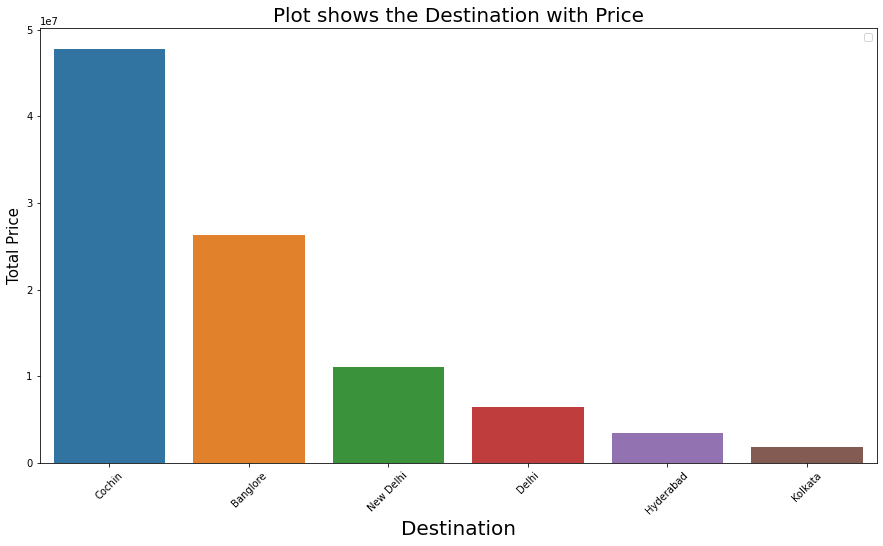

In [51]:
plt.figure(figsize=(15,8))
s = sns.barplot(x='Destination',y='Price',data=sorted_des)
rotate=plt.xticks(rotation=45)#rotating 45 degrees x axis
s.set_alpha(0.8)
s.set_title('Plot shows the Destination with Price', fontsize=20)#shows the title of the graph
s.set_xlabel('Destination', fontsize=20)#x-axis of the sports
s.set_ylabel('Total Price', fontsize=15)#y axis of the number of medals
plt.legend(fontsize=10)#shows legend
plt.show()#To show plot

## Observation:
 - Cochin has the hightest ticket flare

In [52]:
total = pd.DataFrame(final_df.groupby('Total_Stops',as_index=False)['Price'].sum())
sorted_price = total.sort_values('Price',ascending=False)

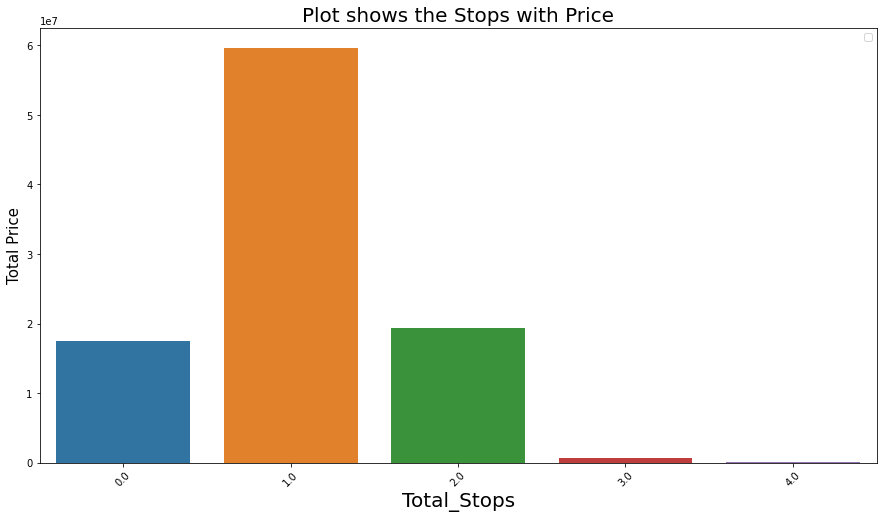

In [53]:
plt.figure(figsize=(15,8))
s = sns.barplot(x='Total_Stops',y='Price',data=sorted_price)
rotate=plt.xticks(rotation=45)#rotating 45 degrees x axis
s.set_alpha(0.8)
s.set_title('Plot shows the Stops with Price', fontsize=20)#shows the title of the graph
s.set_xlabel('Total_Stops', fontsize=20)#x-axis of the sports
s.set_ylabel('Total Price', fontsize=15)#y axis of the number of medals
plt.legend(fontsize=10)#shows legend
plt.show()#To show plot

## Observation:
 - Stop 1 has the highest ticket flare

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [55]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [56]:
final_df.shape

(13350, 15)

In [57]:
df1 = pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

In [58]:
df1

,Route,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_Hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,BLR → DEL,170,0.0,3897.0,24,3,2019,1,10,22,...,1,0,0,0,0,0,0,0,1,0
1,CCU → IXR → BBI → BLR,445,2.0,7662.0,1,5,2019,13,15,5,...,0,0,0,0,0,0,0,0,1,0
2,DEL → LKO → BOM → COK,1140,2.0,13882.0,9,6,2019,4,25,9,...,0,0,0,0,0,0,0,0,1,0
3,CCU → NAG → BLR,325,1.0,6218.0,12,5,2019,23,30,18,...,0,0,0,0,0,0,0,0,1,0
4,BLR → NAG → DEL,285,1.0,13302.0,1,3,2019,21,35,16,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,CCU → DEL → BLR,1435,1.0,NaN,6,6,2019,20,25,20,...,0,0,0,0,0,0,0,0,1,0
2667,CCU → BLR,155,0.0,NaN,27,3,2019,16,55,14,...,0,0,0,0,0,0,0,0,1,0
2668,DEL → BOM → COK,395,1.0,NaN,6,3,2019,4,25,21,...,0,0,0,0,0,0,0,0,1,0
2669,DEL → BOM → COK,915,1.0,NaN,6,3,2019,19,15,4,...,0,0,0,0,0,0,0,0,1,0
